# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utility Functions</a></div><div class="lev1 toc-item"><a href="#MNIST" data-toc-modified-id="MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST</a></div><div class="lev2 toc-item"><a href="#Deep-Autoencoder" data-toc-modified-id="Deep-Autoencoder-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deep Autoencoder</a></div><div class="lev2 toc-item"><a href="#Shallow-Autoencoder" data-toc-modified-id="Shallow-Autoencoder-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Shallow Autoencoder</a></div><div class="lev1 toc-item"><a href="#Denoising-Autoencoder" data-toc-modified-id="Denoising-Autoencoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Denoising Autoencoder</a></div><div class="lev1 toc-item"><a href="#Sparse-Autoencoders" data-toc-modified-id="Sparse-Autoencoders-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sparse Autoencoders</a></div>

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


# Utility Functions

In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

# MNIST
We will be working with MNIST, a collection of handwritten digits.

In [3]:
# Download MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


## Intro
To get a feel for the API of Keras, you will start by implementing a regular Neural Net, i.e. predict the label. If everything went correctly, the accuracy should be abover 0.9.

Basic Keras documentation can be found here: https://keras.io/#getting-started-30-seconds-to-keras

In [4]:
# Parameters
input_size = x_train.shape[1]
output_size = y_train.shape[1]
hidden_size = 32
nr_epochs = 5
activation_hidden = 'relu'
activation_out = 'softmax'
optimizer = 'adam'
loss = 'categorical_crossentropy'

#### DEFINE NEURAL NET
# Define model
model = Sequential()
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=input_size))
model.add(Dense(units=output_size, activation=activation_out, input_dim=hidden_size))

# Compile the model and train
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=nr_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.5160 - acc: 0.8589 - val_loss: 0.2704 - val_acc: 0.9220
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.2446 - acc: 0.9310 - val_loss: 0.2090 - val_acc: 0.9387
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.1981 - acc: 0.9440 - val_loss: 0.1849 - val_acc: 0.9459
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.1721 - acc: 0.9505 - val_loss: 0.1690 - val_acc: 0.9505
Epoch 5/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.1509 - acc: 0.9572 - val_loss: 0.1586 - val_acc: 0.9524
Test loss: 0.15861682393290102
Test accuracy: 0.9524


## Shallow Autoencoder
First we are going to look at a vanilla one-layer auto encoder. Here we simply go from the input to the bottleneck (hidden layer) back to the output. 

In [5]:
# Parameters
input_size = x_train.shape[1]
code_size = 32
nr_epochs = 3
activation_hidden = 'relu'
activation_out = 'sigmoid'
optimizer = 'adam'
loss = 'binary_crossentropy'

# Define model
model = Sequential()
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=input_size))
model.add(Dense(units=input_size, activation=activation_out, input_dim=hidden_size))

# Compile the model and train
model.compile(loss=loss, optimizer=optimizer)
model.fit(x_train, x_train, epochs=nr_epochs)

Epoch 1/3
60000/60000 [==============================] - 6s 93us/step - loss: 0.1619
Epoch 2/3
60000/60000 [==============================] - 4s 75us/step - loss: 0.1042
Epoch 3/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.0964


We can plot the reconstructed digits to see if our model has learned the correct transformations. If the output is almost the same as the input, the model performed well!

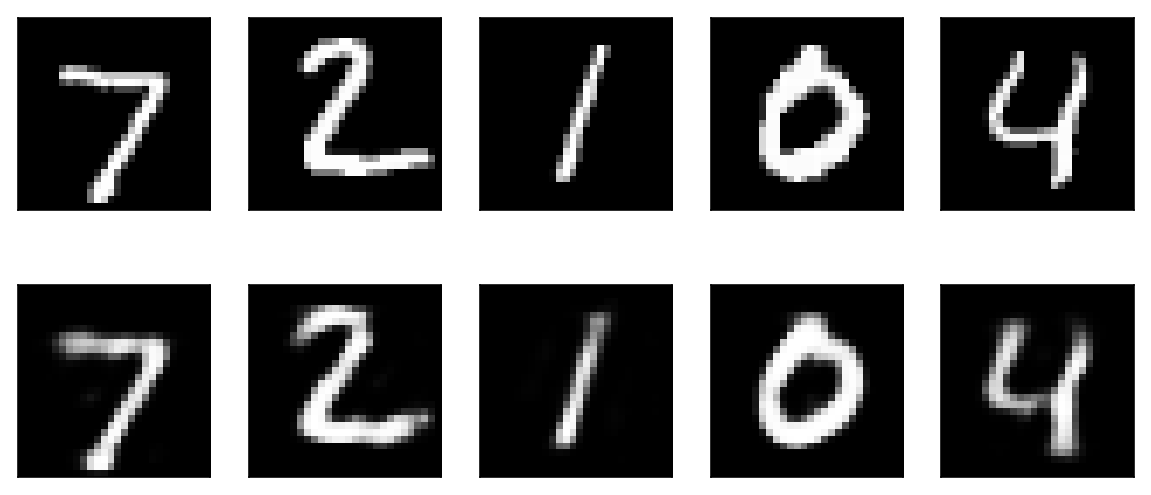

In [6]:
plot_autoencoder_outputs(model, 5, (28, 28))

We can also plot the weights to see how the transformations approximately look like, if done correctly the weights correspond to some kind of pseudo-digits!

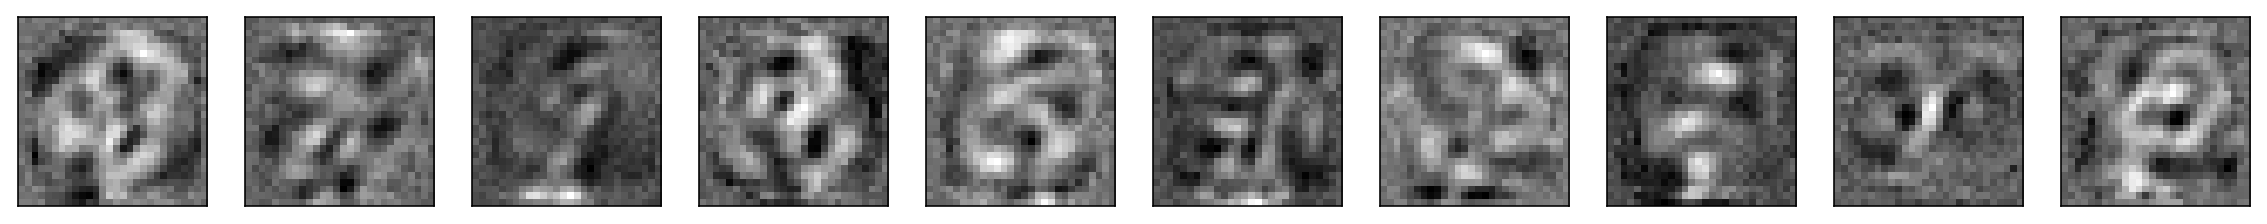

In [7]:
weights = model.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Deep Autoencoder
Next up, a deep auto encoder, imagine here that a single network produces the bottleneck, while another network produces the output.

In [8]:
# Parameters
input_size = x_train.shape[1]
hidden_size = 128
code_size = 32
nr_epochs = 3
activation_hidden = 'relu'
activation_out = 'sigmoid'
optimizer = 'adam'
loss = 'binary_crossentropy'

# DEFINE THE MODEL HERE
model = Sequential()
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=input_size))
model.add(Dense(units=code_size, activation=activation_hidden, input_dim=hidden_size))
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=code_size))
model.add(Dense(units=input_size, activation=activation_out, input_dim=hidden_size))
######################

# Compile the model and fit
model.compile(loss=loss, optimizer=optimizer)
# Fit the model here
model.fit(x_train, x_train, epochs=nr_epochs)

Epoch 1/3
60000/60000 [==============================] - 7s 123us/step - loss: 0.1359
Epoch 2/3
60000/60000 [==============================] - 8s 136us/step - loss: 0.0979
Epoch 3/3
60000/60000 [==============================] - 8s 132us/step - loss: 0.0925


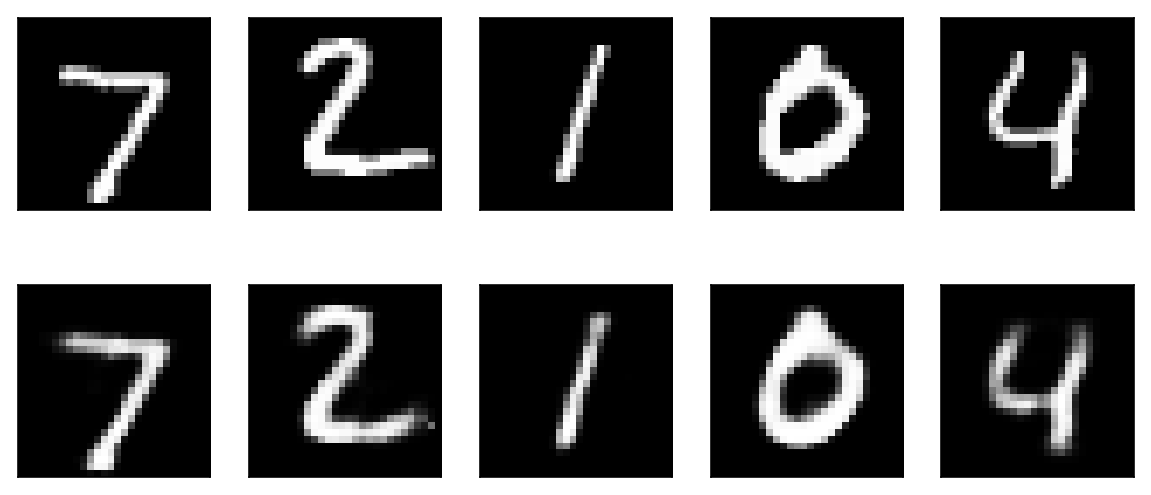

In [9]:
plot_autoencoder_outputs(model, 5, (28, 28))

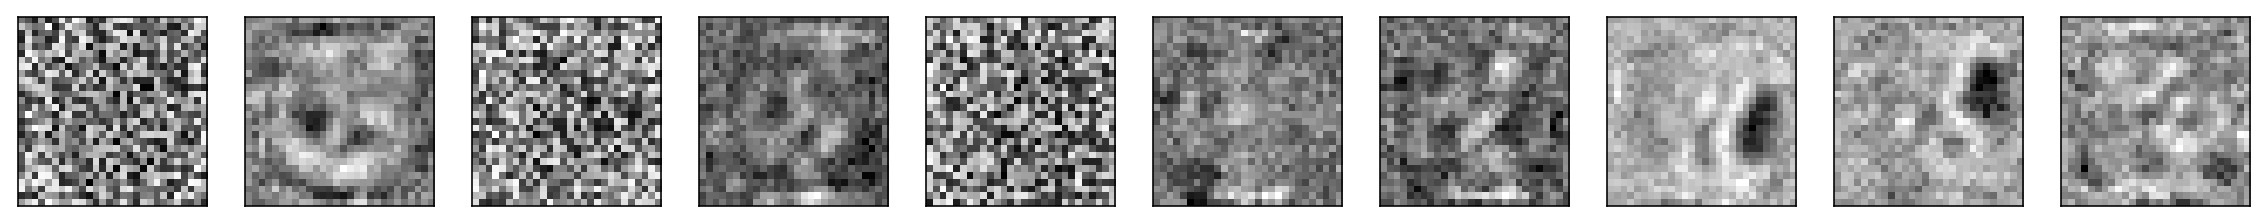

In [10]:
weights = model.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Denoising Autoencoder
A very interesting application of auto encoders is that of denoising. Recover the original input given a source of noise over the input. First, we need to add noise to the input, we can use standard Gaussian noise for that (https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html). Do not forget to scale the noise when adding it to the input, otherwise results will be sub-optimal! 

In mathematical terms:

$$ \tilde{x} = x + \lambda \cdot \epsilon \quad \text{with} \, \epsilon \sim \mathcal{N}(0,1)$$

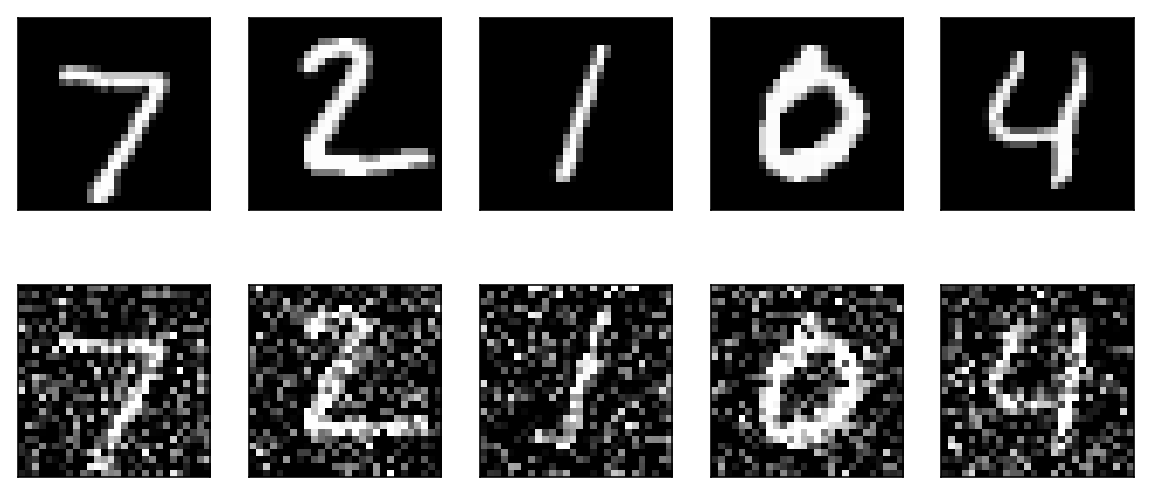

In [11]:
# Define noise scaling factor
noise_factor = 0.4

#### ADD NOISE TO THE INPUT
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

# Keep the pixels in a valid range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Plot images
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot Noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

We see that the weights for the deep autoencoder are less 'pronounced'. Why do you think this is the case?

If everything went correctly, you should see the corrupted version of the digits below the actual ones. Now it is time to train the model to do the denoising, think carefully about the correct input-output structure!

In [12]:
# Parameters
input_size = x_train.shape[1]
hidden_size = 128
code_size = 32
nr_epochs = 10
activation_hidden = 'relu'
activation_out = 'sigmoid'
optimizer = 'adam'
loss = 'binary_crossentropy'

# DEFINE DENOISING AUTOENCODING HERE
model = Sequential()
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=input_size))
model.add(Dense(units=code_size, activation=activation_hidden, input_dim=hidden_size))
model.add(Dense(units=hidden_size, activation=activation_hidden, input_dim=code_size))
model.add(Dense(units=input_size, activation=activation_out, input_dim=hidden_size))
######################

# Compile the model and fit
model.compile(loss=loss, optimizer=optimizer)
# Fit the model here
model.fit(x_train_noisy, x_train, epochs=nr_epochs)

Epoch 1/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1637
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1258
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1186
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1151
Epoch 5/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1130
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1117
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1107
Epoch 8/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1099
Epoch 9/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1091
Epoch 10/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1085


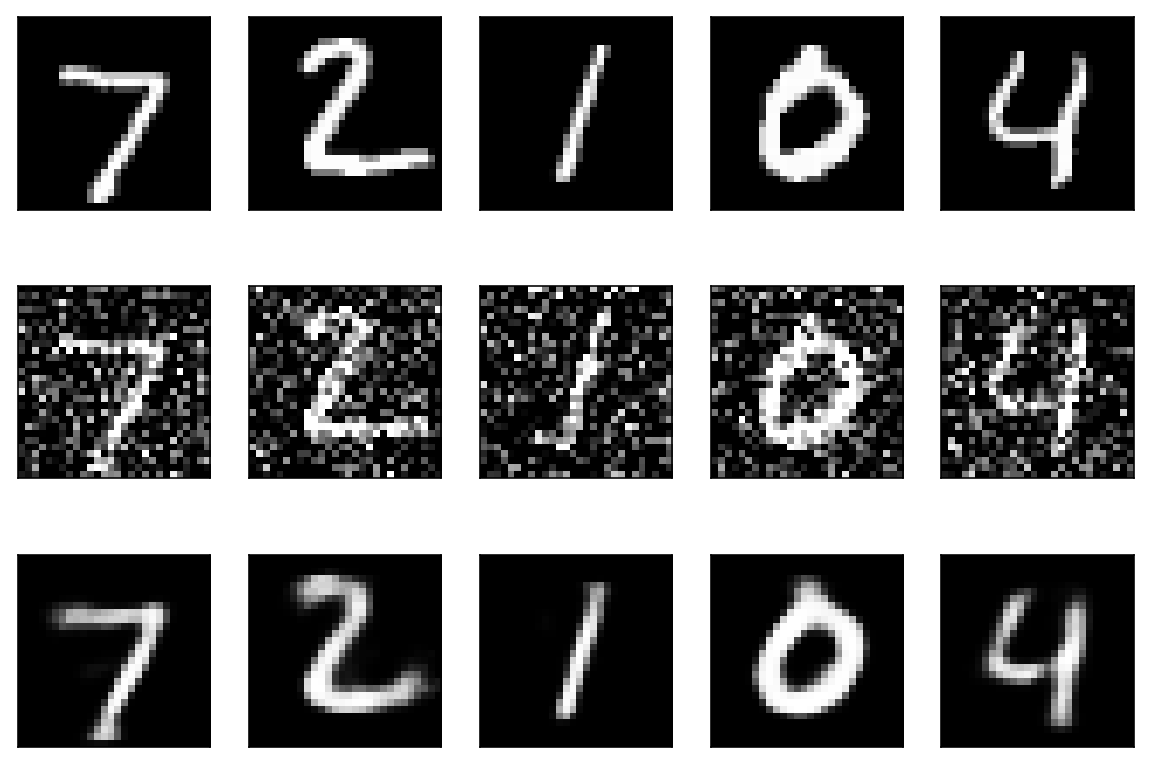

In [13]:
# Plot result of the denoising autoencoder
n = 5
plt.figure(figsize=(10, 7))

images = model.predict(x_test_noisy)

for i in range(n):
    # Plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # Plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # Plot reconstructed image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

# Sparse Autoencoders
Now we are going to make sparse autoencoders, remember that the only thing that changes is that we want to constrain our models to use less hidden units per example! 

Tip: check out https://keras.io/regularizers/

In [14]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu', activity_regularizer = l1(11e-6))(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_regularized.fit(x_train, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1841
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1296
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.1192
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1152
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1127


In [15]:
### Train regular auto-encoder for 20 epochs
input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(x_train, x_train, epochs=5)

autoencoder_standard = Model(input_img, code)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1632
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1049
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0965
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0949
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0944


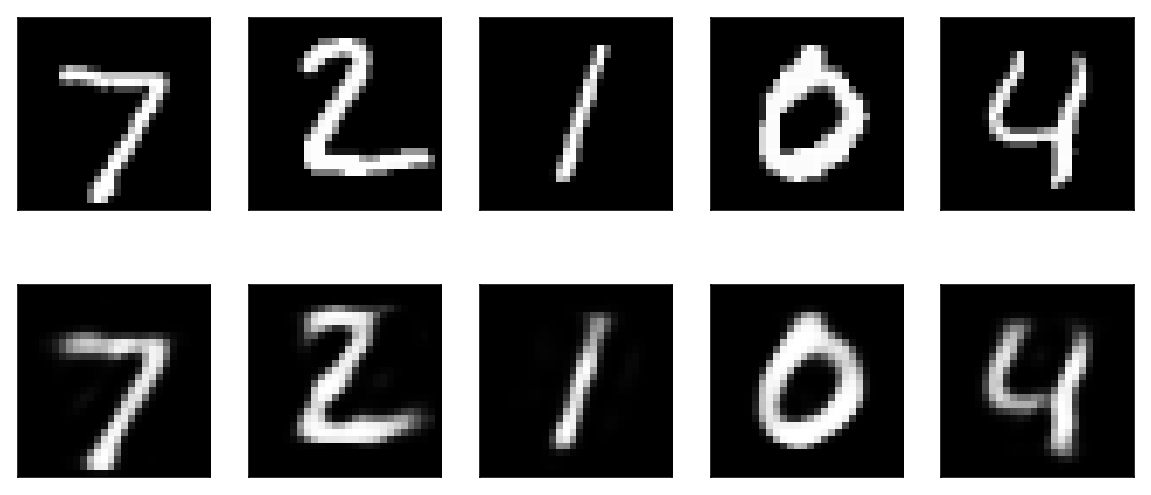

In [16]:
plot_autoencoder_outputs(autoencoder_regularized, 5, (28, 28))

## Compare sparse and regular activations
First, we compute the average activation of both models. Afterwards, we plot the distribution of the activations for both models. Note the amount of unused activations in the sparse autoencoder, exactly what we wanted!

In [17]:
print('Average activation of regular model:')
print(autoencoder_standard.predict(x_test).mean())
print('Average activation of sparse model:')
print(autoencoder_regularized.predict(x_test).mean())

Average activation of regular model:
8.373212
Average activation of sparse model:
0.13062395


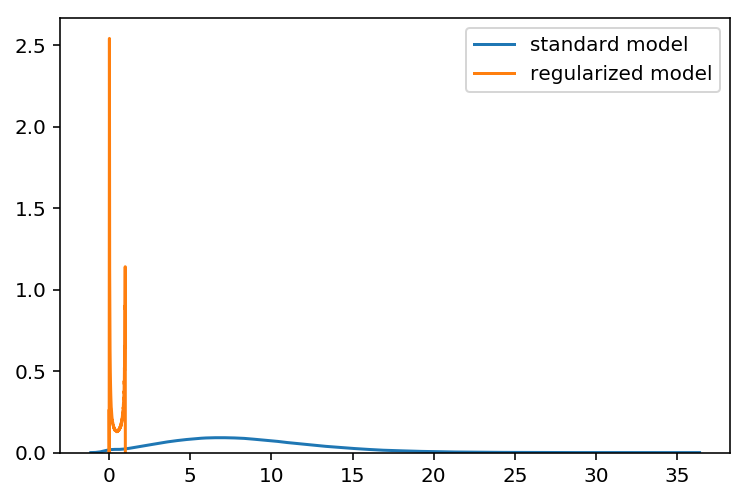

In [18]:
standard_scores = autoencoder_standard.predict(x_test).ravel()
regularized_scores = autoencoder_regularized.predict(x_test).ravel()
sns.distplot(standard_scores, hist=False, label='standard model')
sns.distplot(regularized_scores, hist=False, label='regularized model')

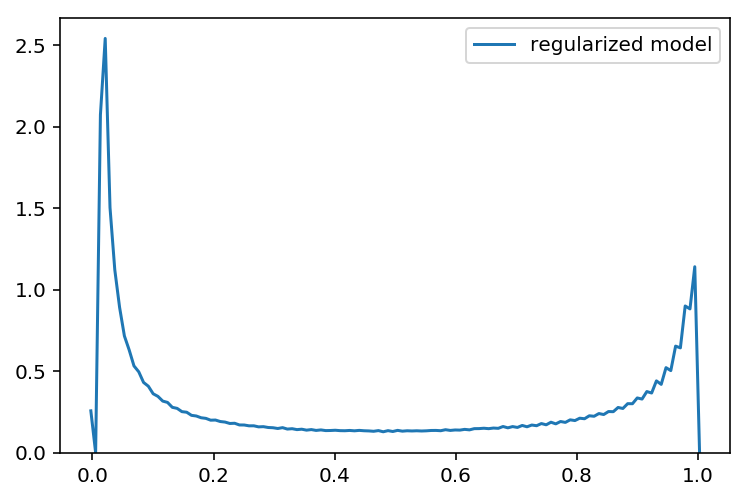

In [19]:
sns.distplot(regularized_scores, hist=False, label='regularized model')

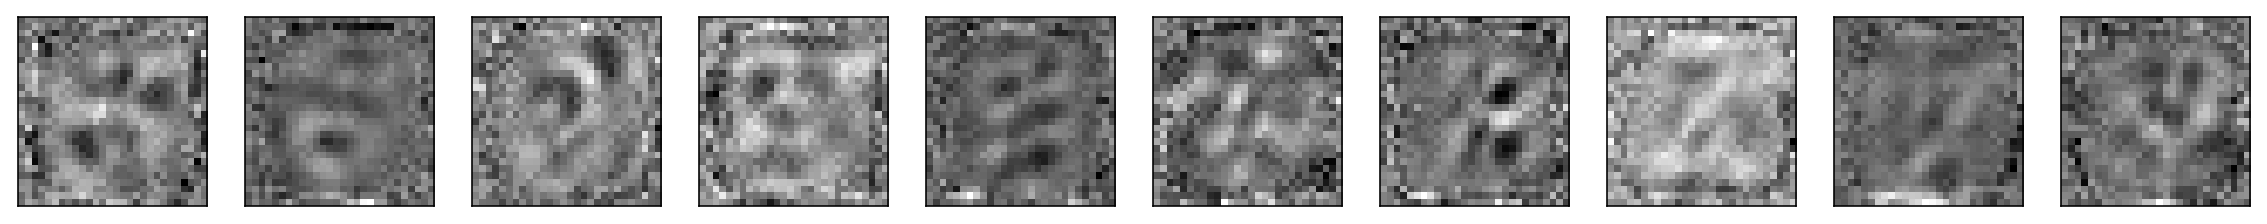

In [20]:
weights = autoencoder_regularized.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

We can also observe that units are getting more specialized when regularized, this is also exactly what we wanted to see!